# Part 1 – CLUSTER ANALYSIS.



In [ ]:
import pandas as pd
import numpy as np
import os
from scipy.cluster import hierarchy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [ ]:
# Read dataset and print first 5 rows
data = pd.read_csv("imdb_dataset.csv", encoding="latin")
df=data
data.head()


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Remove unneeded columns and print the new modified DF
dropped = ['Unnamed', 'thtr_rel_month', 'thtr_rel_day', 'best_dir_win', 'top200_box']
df = df.drop(columns=[col for col in dropped if col in df.columns])
print(df)


     Unnamed: 0                        title    title_type  \
0             1                  Filly Brown  Feature Film   
1             2                     The Dish  Feature Film   
2             3          Waiting for Guffman  Feature Film   
3             4         The Age of Innocence  Feature Film   
4             5                  Malevolence  Feature Film   
..          ...                          ...           ...   
646         647           Death Defying Acts  Feature Film   
647         648                   Half Baked  Feature Film   
648         649            Dance of the Dead  Feature Film   
649         650  Around the World in 80 Days  Feature Film   
650         651                          LOL  Feature Film   

                  genre  runtime mpaa_rating                    studio  \
0                 Drama     80.0           R       Indomina Media Inc.   
1                 Drama    101.0       PG-13     Warner Bros. Pictures   
2                Comedy     84.0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


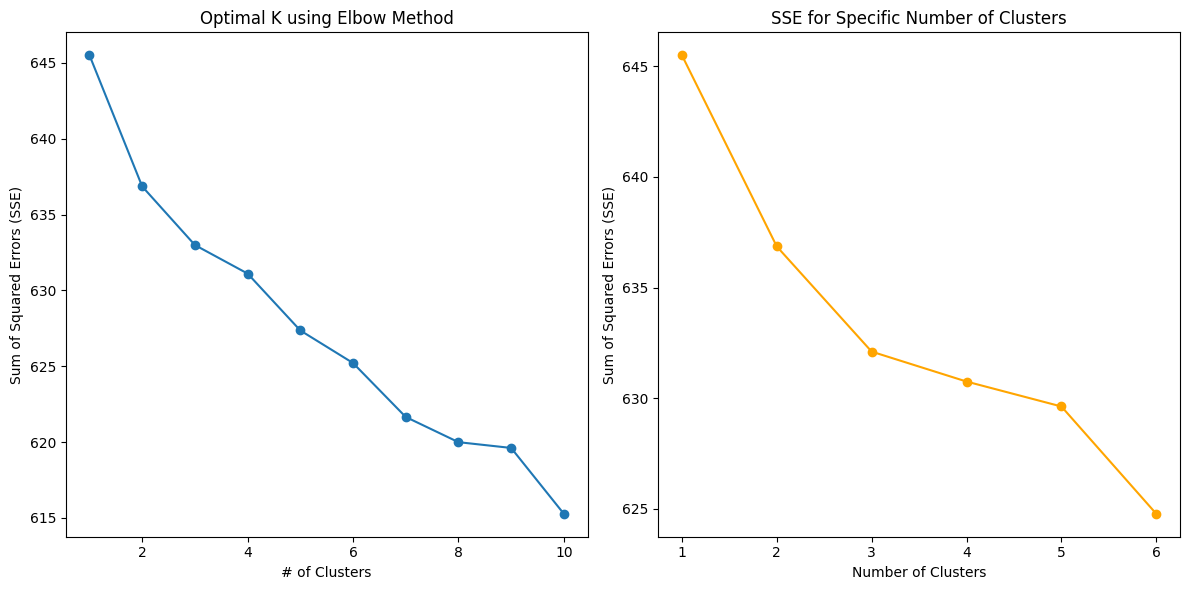

In [ ]:
# Use 'title' column for text analysis
X = df['title']

# Convert text data to TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
num_clusters_range = range(1, 11)
sse_values = [] # SEE = Sum of Squared Errors

# Loop over the range to calculate SSE for each number of clusters
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_matrix)
    sse_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(num_clusters_range, sse_values, marker='o')
plt.title('Optimal K using Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')

# Analyze SSE specific number of clusters
specific_num_clusters = [1, 2, 3, 4, 5, 6]
specific_sse_values = []

for num_clusters in specific_num_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_matrix)
    specific_sse_values.append(kmeans.inertia_)

plt.subplot(1, 2, 2)
plt.plot(specific_num_clusters, specific_sse_values, marker='o', color='orange')
plt.title('SSE for Specific Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')

plt.tight_layout()
plt.show()

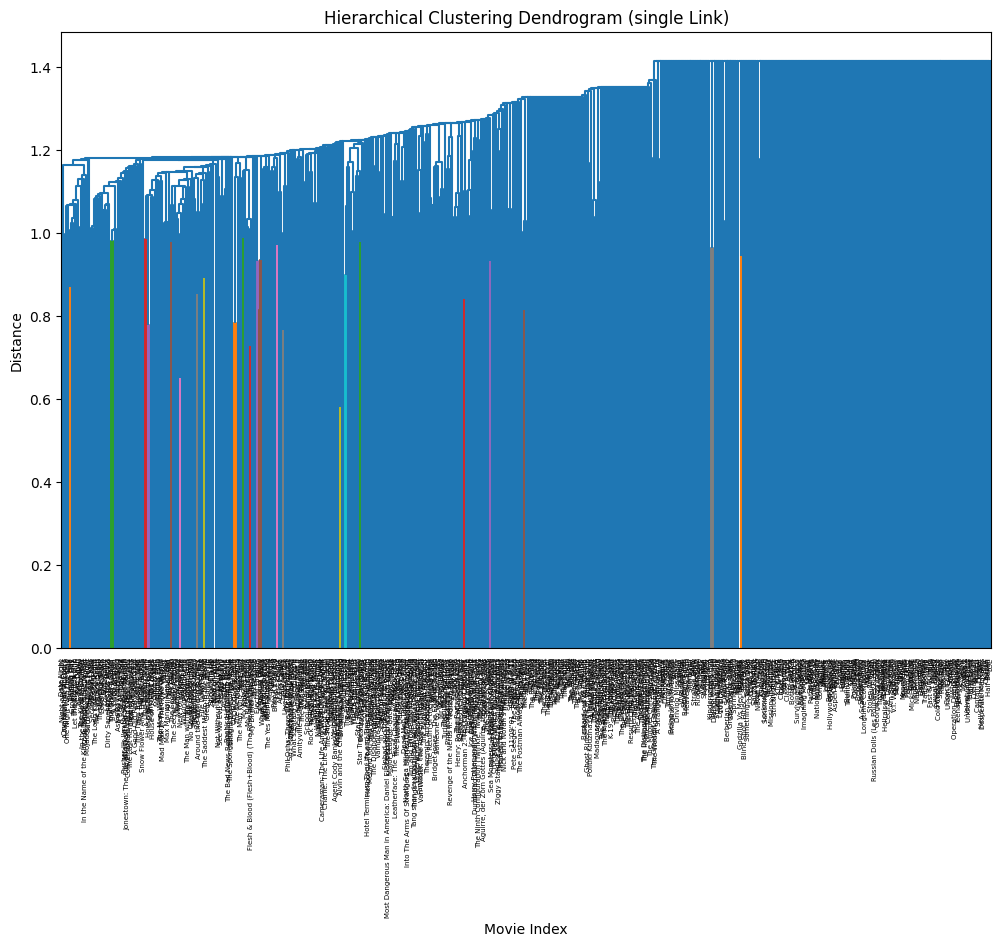

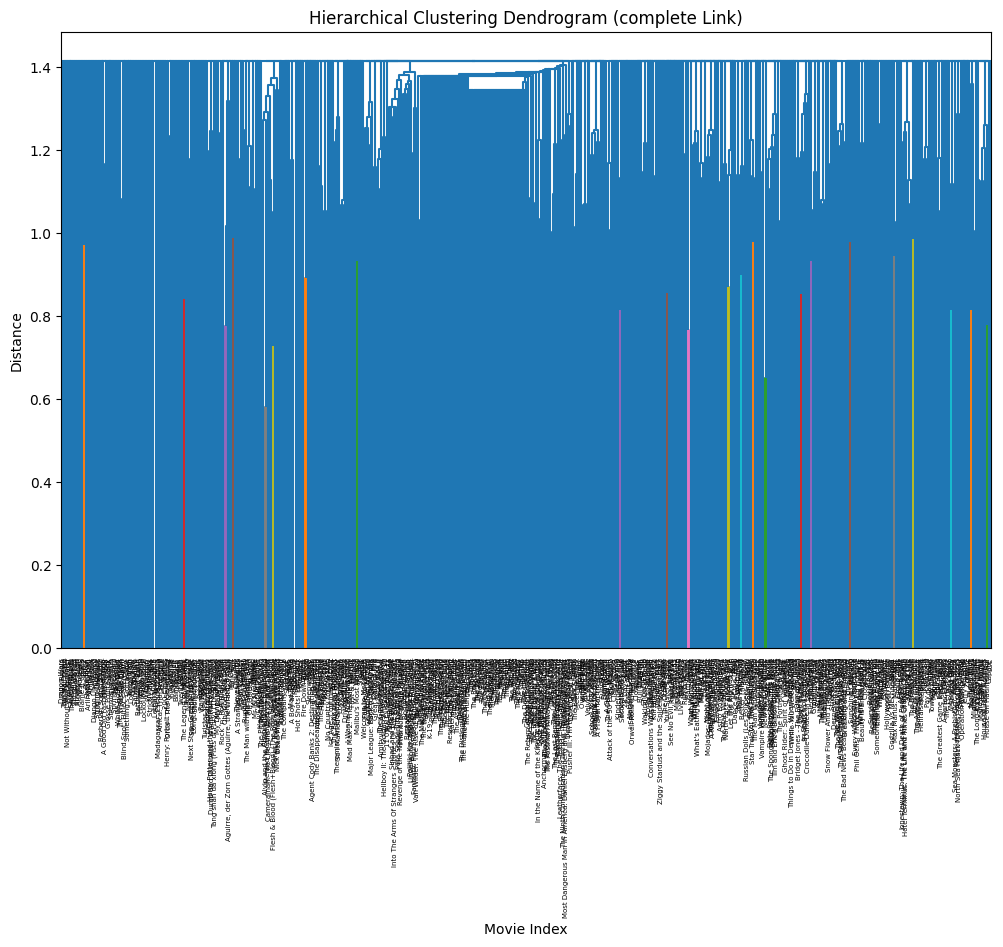

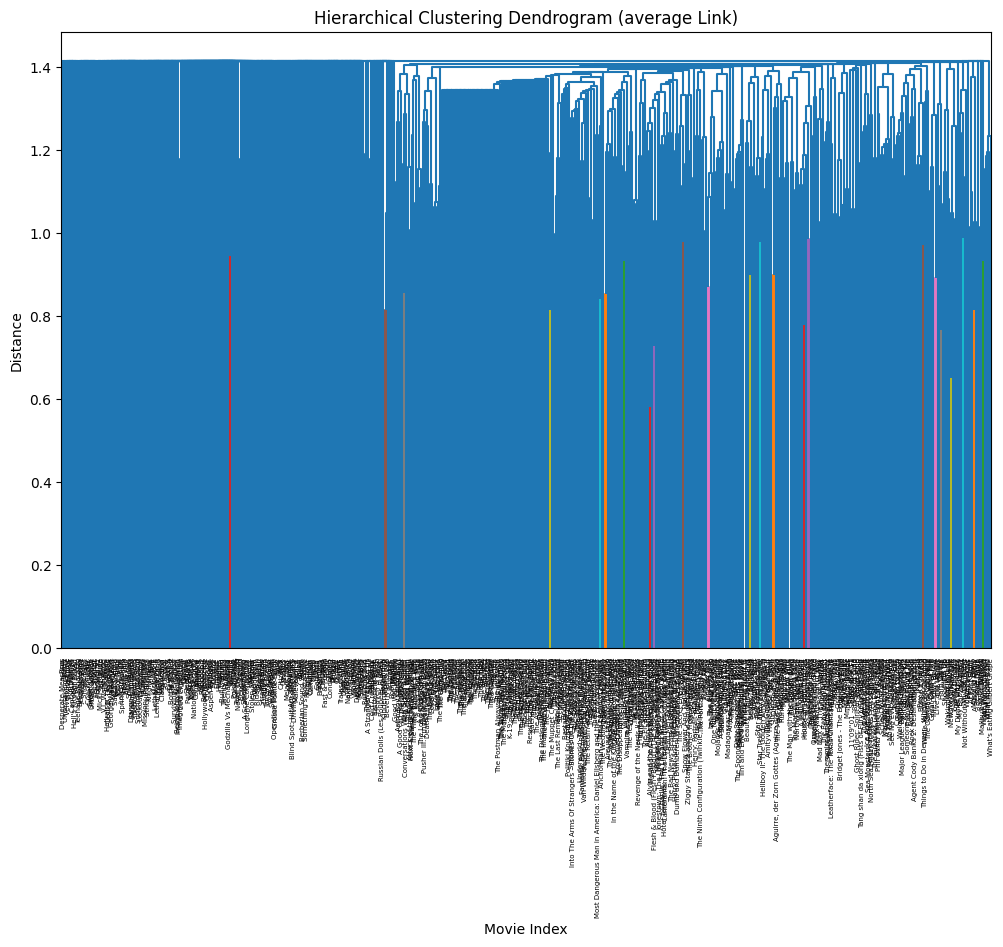

KMeans  Results:
                  title  KMeans_Cluster
0           Filly Brown               2
1              The Dish               1
2   Waiting for Guffman               2
3  The Age of Innocence               1
4           Malevolence               2


In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)



#1.4. For hierarchical clustering, apply single, complete and average link and display the
#dendogram (the plot that visualizes the hierarchy).

linkage_methods = ['single', 'complete', 'average']
for linkage_method in linkage_methods:
    # Create linkage matrix and perform hierarchical clustering
    linkage_matrix = linkage(tfidf_matrix.toarray(), method=linkage_method)
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, orientation='top', labels=X.tolist(), distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({linkage_method} Link)')
    plt.xlabel('Movie Index')
    plt.ylabel('Distance')
    plt.show()

df['KMeans_Cluster'] = kmeans_labels
print("KMeans  Results:")
print(df[['title', 'KMeans_Cluster']].head())

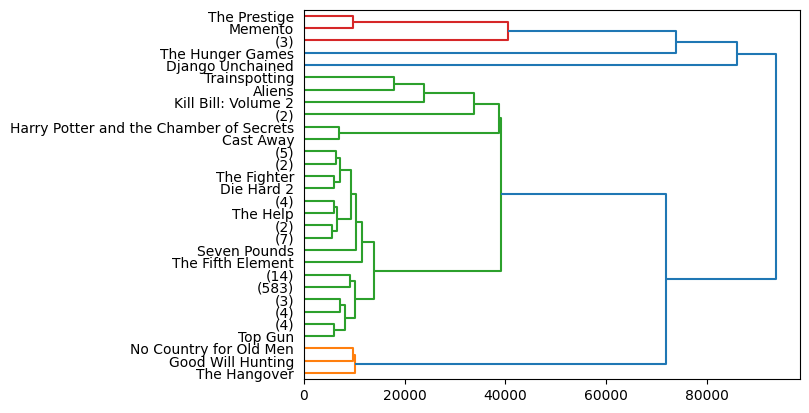

In [ ]:
# Preprocessing numerical columns for hierarchical clustering
numCol = df.select_dtypes(include=['number'])
numCol = numCol.fillna(numCol.mean())
numCol.replace([np.inf, -np.inf], np.nan, inplace=True)
numCol = numCol.dropna()

# Performing hierarchical clustering using 'single' linkage and plotting dendrogram
Z = hierarchy.linkage(numCol.values, 'single')
dn = hierarchy.dendrogram(Z, labels=df['title'].tolist(), orientation='right', truncate_mode='lastp', p=30)
plt.show()

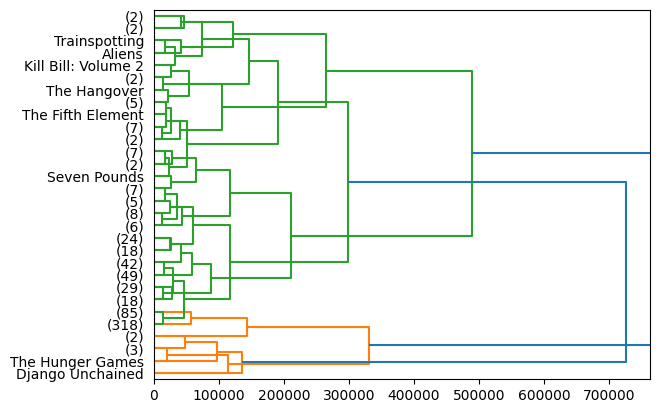

In [ ]:
# Performing hierarchical clustering using 'complete' linkage and plotting dendrogram
Z = hierarchy.linkage(numCol.values, 'complete')
dn = hierarchy.dendrogram(Z, labels=df['title'].tolist(), orientation='right', truncate_mode='lastp', p=30)

# Performing hierarchical clustering using 'average' linkage and plotting dendrogram
Z = hierarchy.linkage(numCol.values, 'average')
dn = hierarchy.dendrogram(Z, labels=df['title'].tolist(), orientation='right', truncate_mode='lastp', p=30)

# Part 2 – TEXT MINING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Create DF from sample text data for text mining
text_data = [
    'Now for manners use has company believe parlors.',
    'Least nor party who wrote while did. Excuse formed as is agreed admire so on result parish.',
    'Put use set uncommonly announcing and travelling. Allowance sweetness direction to as necessary.',
    'Principle oh explained excellent do my suspected conveying in.',
    'Excellent you did therefore perfectly supposing described. ',
    'Its had resolving otherwise she contented therefore.',
    'Afford relied warmth out sir hearts sister use garden.',
    'Men day warmth formed admire former simple.',
    'Humanity declared vicinity continue supplied no an. He hastened am no property exercise of.',
    'Dissimilar comparison no terminated devonshire no literature on. Say most yet head room such just easy.'
]

df = pd.DataFrame({'Text': text_data})

# 2.3. Your task is to create a count vector and a tfidf vector on the given data (refer to 2.
#In the resources below)

# Initializing a CountVectorizer and transforming the text data into count vectors
count_vectorizer = CountVectorizer()
count_vector = count_vectorizer.fit_transform(text_data)
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(text_data)

# 2.4. Display the count vector and tfidf vector and explain the usage of tfidf.
print("Count V:")
print(pd.DataFrame(count_vector.toarray(), columns=count_vectorizer.get_feature_names_out()))
print("\nTF-IDF V")
print(pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names_out()))


Count V:
   admire  afford  agreed  allowance  am  an  and  announcing  as  believe  \
0       0       0       0          0   0   0    0           0   0        1   
1       1       0       1          0   0   0    0           0   1        0   
2       0       0       0          1   0   0    1           1   1        0   
3       0       0       0          0   0   0    0           0   0        0   
4       0       0       0          0   0   0    0           0   0        0   
5       0       0       0          0   0   0    0           0   0        0   
6       0       1       0          0   0   0    0           0   0        0   
7       1       0       0          0   0   0    0           0   0        0   
8       0       0       0          0   1   1    0           0   0        0   
9       0       0       0          0   0   0    0           0   0        0   

   ...  travelling  uncommonly  use  vicinity  warmth  while  who  wrote  yet  \
0  ...           0           0    1         0      

2.4  explain the usage of tfidf.

Term Frequency-Inverse Document Frequency, measures a word's significance in a document compared to a corpus. It combines term frequency (word occurrence) and inverse document frequency (uniqueness across the corpus). Widely used in text mining and information retrieval, TF-IDF helps identify important words in documents for various natural language processing (NLP) applications.

# Part 3 - ANN

In [ ]:
!pip install pycountry
!pip install autocorrect
import pandas as pd
import numpy as np
import pycountry
import re
import pycountry
from autocorrect import Speller
import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=ec8c9e0ac07c88919c13128307d6a6ac1ed3665bc16834e82f8aefdfd1a37904
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=1d804b55b4b317c3c274c8f69dad6ce3b53d093658a704d91afbfe8b5a7ff568
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


ModuleNotFoundError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

#Loading the data

In [ ]:
data = pd.read_csv("Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv", encoding="latin")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#Cleaning the Data

#ANN


##Loading data

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
# import pycountry
import re
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Add, Activation
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle



data = pd.read_csv("Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv", encoding="latin")
X = data.drop(columns=['Chance of Admit ','Serial No.'])
y = data['Chance of Admit '].to_numpy()

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
# data.head()



FileNotFoundError: ignored

#Runing model

In [ ]:
X_train[0]

KeyError: ignored

In [ ]:
# Assuming 'data' is your DataFrame
first_row = data.iloc[0]
print(first_row)

Serial No.             1.00
GRE Score            337.00
TOEFL Score          118.00
University Rating      4.00
SOP                    4.50
LOR                    4.50
CGPA                   9.65
Research               1.00
Chance of Admit        0.92
Name: 0, dtype: float64


Epoch 1/15
13/13 [==============================] - 3s 36ms/step - loss: 1.1477 - accuracy: 0.0000e+00 - precision: 0.7722 - recall: 0.6022 - f1: 0.6727 - val_loss: 47.1370 - val_accuracy: 0.0000e+00 - val_precision: 0.7012 - val_recall: 1.0000 - val_f1: 0.8241
Epoch 2/15
13/13 [==============================] - 0s 6ms/step - loss: 0.7363 - accuracy: 0.0000e+00 - precision: 0.7454 - recall: 0.7543 - f1: 0.7482 - val_loss: 33.5382 - val_accuracy: 0.0000e+00 - val_precision: 0.7012 - val_recall: 1.0000 - val_f1: 0.8241
Epoch 3/15
13/13 [==============================] - 0s 6ms/step - loss: 0.6827 - accuracy: 0.0000e+00 - precision: 0.7418 - recall: 0.8345 - f1: 0.7837 - val_loss: 19.5136 - val_accuracy: 0.0000e+00 - val_precision: 0.7012 - val_recall: 1.0000 - val_f1: 0.8241
Epoch 4/15
13/13 [==============================] - 0s 7ms/step - loss: 0.6325 - accuracy: 0.0000e+00 - precision: 0.7522 - recall: 0.8195 - f1: 0.7822 - val_loss: 7.5946 - val_accuracy: 0.0000e+00 - val_precision: 0

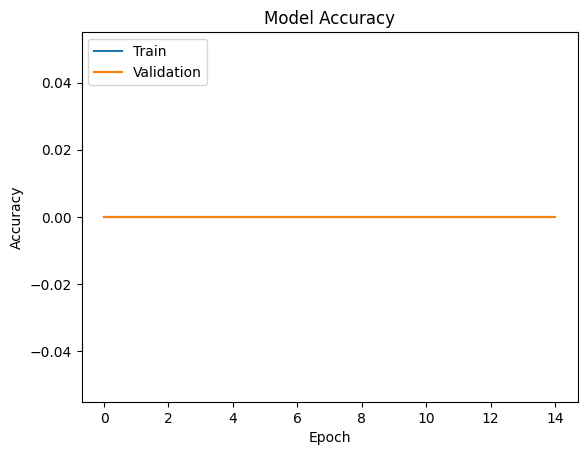

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Add, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Define Residual Block
def residual_block(input_tensor, filters, kernel_size):
    x = BatchNormalization()(input_tensor)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

# Create the model
def create_model(input_shape):
    inputs = Input(shape=(input_shape,))

    x = Dense(64)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Adding Residual Blocks
    for _ in range(3):
        x = residual_block(x, 32, (3, 3))

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model
# Custom metric functions using TensorFlow operations
def f1(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.math.round(y_pred), tf.float32)
    return 2 * tf.reduce_sum(y_true * y_pred) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + 1e-15)

def precision(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.math.round(y_pred), tf.float32)
    true_positives = tf.reduce_sum(y_true * y_pred)
    total_predicted_positives = tf.reduce_sum(y_pred)
    return true_positives / (total_predicted_positives + 1e-15)

def recall(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.math.round(y_pred), tf.float32)
    true_positives = tf.reduce_sum(y_true * y_pred)
    total_actual_positives = tf.reduce_sum(y_true)
    return true_positives / (total_actual_positives + 1e-15)

# Assuming you have training and validation data (X_train, y_train, X_test, y_val)
input_shape = X_train.shape[1]  # Define the input shape based on the number of features
model = create_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall,f1])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32)

# Plotting the metrics across epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()





In [ ]:
val=100
# Assuming 'data' is your DataFrame
first_row = X_train.iloc[val]

print(y_train[val])
# Assuming 'data' is your DataFrame and 'model' is your trained model
first_row = X_train.iloc[val]  # Extract the first row from your training data
first_row_reshaped = first_row.values.reshape(1, -1)  # Reshape to (1, 7) or appropriate shape

prediction = model.predict(first_row_reshaped)
print(prediction)

0.78
1/1 [==============================] - 0s 68ms/step
[[2.6447331e-08]]


#Neural network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
df

In [ ]:
for col in df.columns:
    if re.match('^Unnamed:', col):
        print(True)
        print(len(col))
        df=df.drop(columns=[col])


True
10


In [ ]:
df

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,2008.0,...,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,1998.0,...,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,2008.0,...,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,2004.0,...,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


In [ ]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [ ]:


#testData = pd.DataFrame(testData, columns=data.columns)
testData

NameError: ignored

In [ ]:
testData = testData.drop('title', axis=1)
encode_text_index(testData,'director')

array(['director'], dtype=object)

In [ ]:
testData

,Unnamed: 0,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Unnamed: 0,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,0,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url


# Part 4 - Report w/ Summarized Findings
### [In Progress] Halfway done, waiting for all parts to be done to summarize

In [ ]:
# Opening and displaying the PDF to the report (instructions say to make PDF)
from IPython.display import IFrame
pdf_path = 'A4 Part 4.pdf'
IFrame(pdf_path, width=800, height=600)
